# 正規化

In [ ]:
import numpy as np

In [5]:
# 0~1の間でランダムに値をサンプリング
randoms = np.random.rand(1000)
mean = np.mean(randoms)
std = np.std(randoms)
# 平均±標準偏差の範囲にいくつ値があるかをカウントする
count = 0
coef = 1
thresh = coef * std
for num in randoms:
    if num > mean - thresh and num < mean + thresh:
        count += 1
print('{}% of the numbers are included within mean±{}std'.format(int(count/len(randoms)*100), coef))

59% of the numbers are included within mean±1std


/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


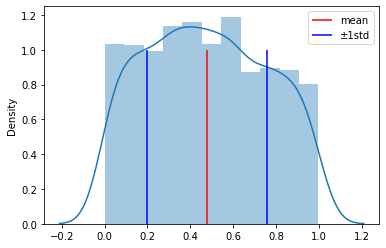

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(randoms)
plt.vlines(mean, 0, 1, 'r', label = "mean")
plt.vlines(mean+coef*std, 0, 1, 'b', label='±{}std'.format(coef))
plt.vlines(mean-coef*std, 0, 1, 'b')
plt.legend()

2つの方法で正規化してみる

In [13]:
import numpy as np
data = [0, 10, 20, 25, 27, 30, 43, 56, 68, 70]
mean = np.mean(data)
std = np.std(data)

z = (data-mean) / std  # 標準化
print('standardized data(z): {}'.format(z))  # 標準化されたあとの値
print('mean: {:.2f}'.format(np.mean(z)))
print('std: {}'.format(np.std(z)))


standardized data(z): [-1.54799532 -1.10444365 -0.66089199 -0.43911615 -0.35040582 -0.21734032
  0.35927685  0.93589402  1.46815602  1.55686636]
mean: 0.00
std: 1.0


In [14]:
from sklearn.preprocessing import StandardScaler

data = np.array([0, 10, 20, 25, 27, 30, 43, 56, 68, 70])
print('data shape: {}'.format(data.shape))
data = np.expand_dims(data, axis=-1)
print('reshaped data shape: {}'.format(data.shape))
# インスタンス作成
scaler = StandardScaler()
# fit_transformの引数にはrank2のnumpy arrayである必要がある
scaled = scaler.fit_transform(data)
print(scaled)

data shape: (10,)
reshaped data shape: (10, 1)
[[-1.54799532]
 [-1.10444365]
 [-0.66089199]
 [-0.43911615]
 [-0.35040582]
 [-0.21734032]
 [ 0.35927685]
 [ 0.93589402]
 [ 1.46815602]
 [ 1.55686636]]


# 共分散

/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'height')

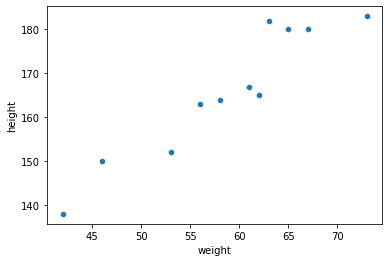

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])
sns.scatterplot(weight,height)
plt.xlabel("weight")
plt.ylabel("height")

In [16]:
np.cov(weight, height)  # 不偏分散、不偏共分散を返す

array([[ 82.81818182, 127.54545455],
       [127.54545455, 218.76363636]])

In [17]:
np.cov(weight, height, bias = True)  # 標準分散、標準共分散を返す

array([[ 75.2892562 , 115.95041322],
       [115.95041322, 198.87603306]])

In [19]:
import pandas as pd
df = pd.DataFrame({"weight":weight, "height":height})
df

,weight,height
0,42,138
1,46,150
2,53,152
3,56,163
4,58,164
5,61,167
6,62,165
7,63,182
8,65,180
9,67,180


In [20]:
df.cov()

,weight,height
weight,82.818182,127.545455
height,127.545455,218.763636


相関係数を求めてみる

In [21]:
import numpy as np
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])
 
r = np.corrcoef(weight, height)
r

array([[1.        , 0.94757714],
       [0.94757714, 1.        ]])

In [22]:
import pandas as pd
df = pd.DataFrame({'weight':weight, 'height':height})
df.corr()

,weight,height
weight,1.000000,0.947577
height,0.947577,1.000000


<AxesSubplot:>

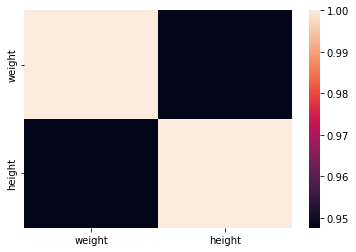

In [24]:
import seaborn as sns
sns.heatmap(df.corr())

ランダムなデートセットで相関を見てみる

In [26]:
import numpy as np
def generate_values(r=0.5, num=1000):
    
    # 値を標準正規分布からランダムで作成
    a = np.random.randn(num)
    # 誤差項1 'a'に誤差項1を加えたものをxとする
    e1 = np.random.randn(num)
    # 誤差項2　'a'に誤差項2を加えたものをyとする
    e2 = np.random.randn(num)
    # 相関係数が負の場合，負の平方根になってしまうので，xの式を負にする
    if r < 0:
        r = -r
        x = -np.sqrt(r)*a - np.sqrt(1-r)*e1
    else:
        x = np.sqrt(r)*a + np.sqrt(1-r)*e1
    y = np.sqrt(r)*a + np.sqrt(1-r)*e2
    # 相関行列からxとyの相関係数を取得
    actual_r = np.corrcoef(x, y)[0][1]
    
    return x, y, actual_r

Text(0.5, 1.0, 'r=0.51')

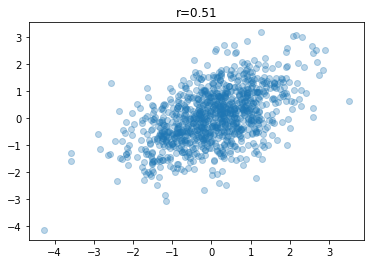

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
 
x, y ,actual_r = generate_values()
plt.scatter(x, y, alpha=0.3)
plt.title('r={:0.2f}'.format(actual_r))

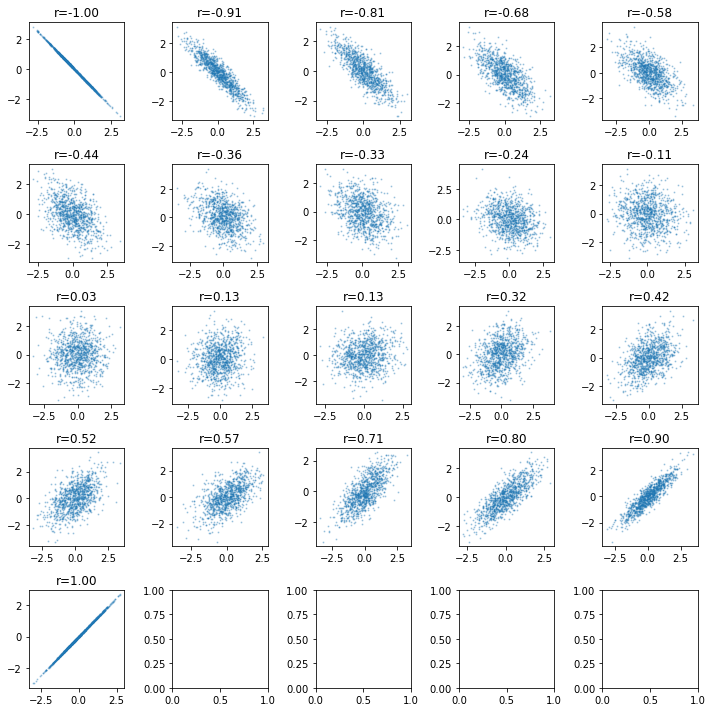

In [28]:
# -1から1の相関係数の散布図を0.1単位で表示したい(計21個)
 
# 7x3の図を表示する(計21個なので)
rows = 5
cols = 5
figsize = (10, 10)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for idx, r in enumerate(np.arange(-1, 1.1, 0.1)):
    # 各plotのどこに配置するかを計算
    row_i = idx//cols 
    col_i = idx%cols
    #相関係数に対してランダムな値を計算
    x, y, actual_r = generate_values(r=r)
    #生成したランダム値から実際の相関係数を表示
    title = 'r={:.2f}'.format(actual_r)
    ax[row_i, col_i].set_title(title)
    ax[row_i, col_i].scatter(x, y, alpha=0.3, s=1)
# タイトルや軸が重なってしまうのを防ぐ
fig.tight_layout()

# 回帰直線

/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

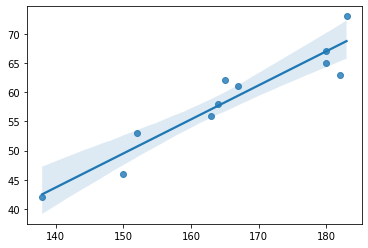

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

sns.regplot(height, weight)

Text(0, 0.5, 'height')

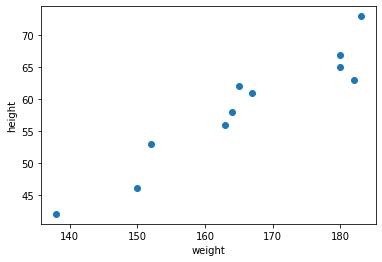

In [4]:
import matplotlib.pyplot as plt

plt.scatter(height, weight)
plt.xlabel("weight")
plt.ylabel("height")

In [7]:
from sklearn.linear_model import LinearRegression

X = np.expand_dims(height, axis=-1)  # 説明変数
y = weight  # 目的変数

reg = LinearRegression()  # インスタンス生成

reg.fit(X, y)   # 学習
print("b={}".format(reg.coef_))
print("a={}".format(reg.intercept_))


b=[0.58302859]
a=-37.94946808510638


## 二項分布

In [1]:
from scipy.stats import binom
data_binom = binom.rvs(n = 3,p = 1/6 , size = 2160)  # サイコロを３回振って２が出る回数

In [2]:
data_binom  # 3回中何回２が出たか

array([0, 0, 0, ..., 0, 0, 0])

/Users/nakamuraayaka/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

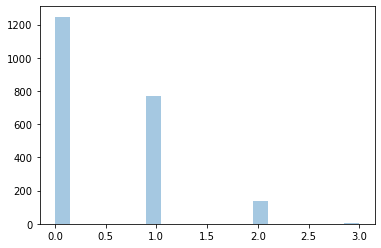

In [4]:
import seaborn as sns
%matplotlib inline

sns.distplot(data_binom, kde = False)

このヒストグラム(を正規化したもの)は限りなく実際の二項分布の確立に近づく

# ポアソン分布

In [6]:
from scipy.stats import poisson
import math
import numpy as np
mu = 30
k = 40
p1 = poisson.pmf(k=k,mu=mu)
# ポアソン分布を式から求める
p2 = (mu**k*np.e**(-mu))/math.factorial(k)

print( p1,p2)

0.013943463479967897 0.013943463479967761


Text(0, 0.5, 'probability')

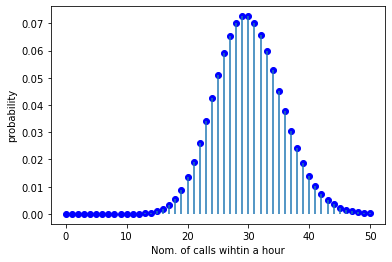

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(51)
plt.plot(x, poisson.pmf(k = x, mu = mu),'bo')
plt.vlines(x, 0, poisson.pmf(k = x,mu = mu))
plt.xlabel("Nom. of calls wihtin a hour")
plt.ylabel("probability")

Text(0, 0.5, 'probability')

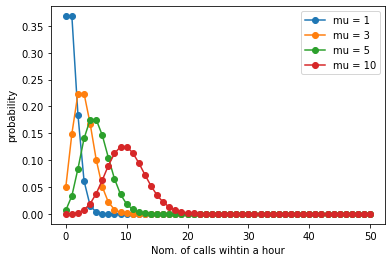

In [11]:
x = np.arange(51)
mu_list = [1,3,5,10]
for idx,mu in enumerate(mu_list):  # リストから、インデックスと中身を取り出す  
    plt.plot(x, poisson.pmf(k = x, mu = mu),'-o', label = "mu = {}".format(mu))
plt.legend()
plt.xlabel("Nom. of calls wihtin a hour")
plt.ylabel("probability")